# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [130]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [131]:
df_abs=pd.read_csv("../data/absences.csv")
df_abs.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

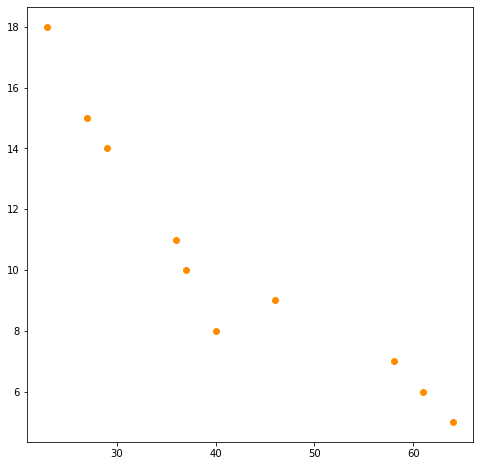

In [132]:
# your code here
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(df_abs["Age"],df_abs["Absences"], c="darkorange")



In [133]:
#There seems to exist a negative correlation between age and work absences

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [134]:

def get_slope_intercept(x,y):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    #Slope
    step1 = []
    step2 = []
    for i in range(len(x)):
        step1.append((x[i]-mean_x)*(y[i]-mean_y))
        step2.append((x[i]-mean_x)**2)
    slope = sum(step1)/sum(step2)
    # Intercept
    #intercept= mean(y)-b1*mean(x)
    intercept = mean_y - (slope*mean_x)
    return slope, intercept

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [135]:
# your code here
age_1=df_abs["Age"]
abs_1=df_abs["Absences"]


In [136]:
slope, intercept=get_slope_intercept(age_1,abs_1)
slope, intercept

(-0.2681088337033404, 21.58738189891063)

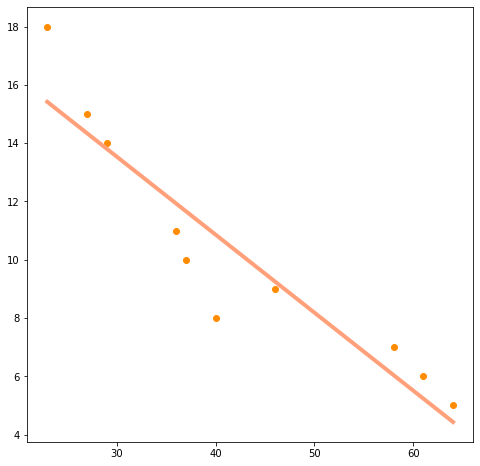

In [137]:
# your code here
#scatter plot:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(df_abs["Age"],df_abs["Absences"], c="darkorange")


# plot regression line:
x = np.array([min(age_1),max(age_1)])
f = lambda x: slope*x + intercept
plt.plot(x,f(x), c="lightsalmon", linewidth=4)


In [138]:
# The linear model seems to fit the data points

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [139]:
# your code here
#Covariance evaluates how the mean values of two variables move together.
#Cov(x,y) = SUM [(xi - xm) * (yi - ym)] / (n - 1)

# I am repeating this, to have it closer, not necessary:

age1=list(age_1)
abs1=list(abs_1)

In [140]:
def get_cov_corr(x,y):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)

    num_x= []
    num_y=[]
    
    for i in range(len(x)):
        num_x.append(x[i]-mean_x)
        num_y.append(y[i]-mean_y)
    num=np.multiply(num_x , num_y)
    num_x=np.array(num_x)
    num_y=np.array(num_y)
    
    den=(len(x)-1)
    cov = sum(num)/(den)
    # Pearson's correlation coefficient =  / sqrt(sum_x^2 *sum_y^2)
    #corr = cov/np.sqrt((np.sum(num_x**2))*np.sum(sum(num_y**2)))
    corr_num=np.sum(num_x*num_y)

    corr_den=np.sqrt((np.sum(num_x**2))*np.sum(num_y**2))
    corr=corr_num/corr_den

    return cov, corr

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [141]:
get_cov_corr(age1,abs1)

(-57.699999999999996, -0.9325434092481012)

In [142]:

#The covariance of -57, shows the strong negative variation.
#The correlation coeafficient of -0,9 wshow as a negative correlation (negative value) and a strong one (close to -1) 

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [143]:
# yes, there is a strong negative correlation between age and absenses

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [144]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [145]:
# your code here
x=ironbeers_df["X"]
y=ironbeers_df["Y"]
get_cov_corr(x,y)

(12.0, 0.9770084209183943)

In [146]:

#Here we see a strong positive correlation between people asked and people stayed.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

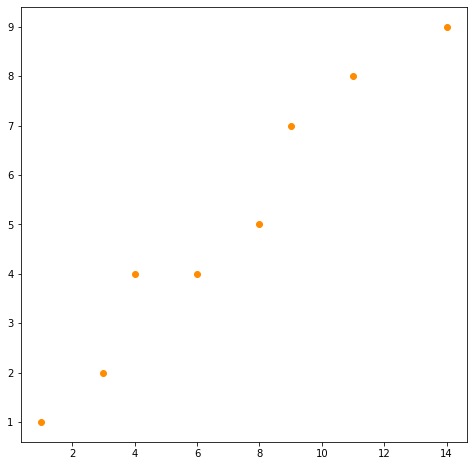

In [147]:

#scatter plot:

# your code here
#scatter plot:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(ironbeers_df["X"],ironbeers_df["Y"], c="darkorange")



In [148]:
# your comments here

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [149]:
# your code here
slope_1, intercept_1=get_slope_intercept(x,y)
print(slope_1, intercept_1)

0.6363636363636364 0.5454545454545459


In [150]:
# I am going to repeat the scatter plot, to dray 

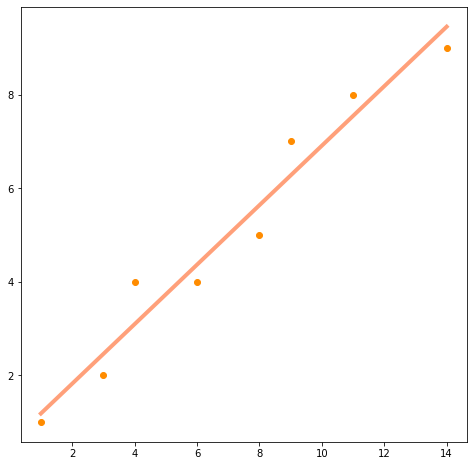

In [151]:

#scatter plot:

# your code here
#scatter plot:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(ironbeers_df["X"],ironbeers_df["Y"], c="darkorange")


# plot regression line:
x = np.array([min(ironbeers_df["X"]),max(ironbeers_df["X"])])
f = lambda x:  intercept_1+(slope_1*x)
plt.plot(x,f(x), c="lightsalmon", linewidth=4)

In [152]:
# I ploted the regression line we get from the slope and intercept, and it fits the data well.
#the positive slope implicates a direct relation between the two variables,
#and the positive intercept shows the movement of the line on the X axes.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [153]:
#this analysis doesn't answer the question if "I am the reason why people leave".
#It only shows that the more people is asked, the more people stays.

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [154]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [155]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [156]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [157]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [158]:
# your code here

In [159]:
# your comments here